<a href="https://colab.research.google.com/github/Zinga18018/Ipynb_Project_Snippets/blob/main/Wine_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score

In [9]:
df= pd.read_csv('wine.data')


In [10]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [11]:
column_names = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
    'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
    'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'
]
df.columns = column_names

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic_acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity_of_ash     177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total_phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid_phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color_intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  OD280                 177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [18]:
df.shape

(177, 14)

In [12]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


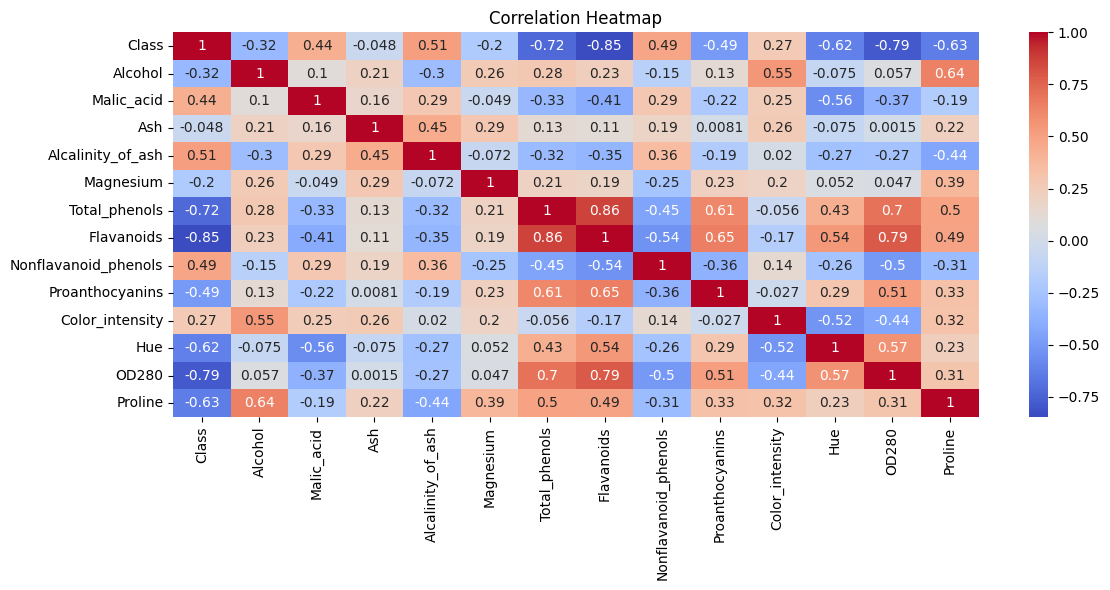

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [19]:
torch.manual_seed(42)

In [22]:
df['Class'].value_counts()

,count
Class,
2,71
1,58
3,48


In [35]:
class NeuralNet(nn.Module):
  def __init__(self,input_features=13,h1=8,h2=9,out=3):
    super().__init__()
    self.fc1 = nn.Linear(input_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out)
    self.relu = nn.ReLU()
  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.out(x)
    return x

In [27]:
x = df.drop('Class',axis=1).values
y = df['Class'].values

In [52]:
x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

print(f"Train: {len(x_train)} | Val: {len(x_val)} | Test: {len(x_test)}")

Train: 105 | Val: 36 | Test: 36


In [54]:
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)
x_val = torch.FloatTensor(x_val)
y_val = torch.LongTensor(y_val)

In [42]:
model = NeuralNet()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [43]:
criterion = nn.CrossEntropyLoss

In [65]:
epochs = 500
loses = []
criterion = nn.CrossEntropyLoss() # Fix 1: Instantiate the criterion
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train - 1) # Fix 2: Use y_train, Fix 3: Adjust labels
  loses.append(loss.item()) # Store scalar loss
  if i%10 == 0:
    print(f'epoch : {i} | loss :{loss.item()}') # Print scalar loss
  loss.backward() # Fix 4: Call .backward() on the loss tensor
  optimizer.step()
  optimizer.zero_grad()

epoch : 0 | loss :0.0008992960210889578
epoch : 10 | loss :0.0008846129640005529
epoch : 20 | loss :0.0008809569990262389
epoch : 30 | loss :0.000869103183504194
epoch : 40 | loss :0.0008452868205495179
epoch : 50 | loss :0.0008317918400280178
epoch : 60 | loss :0.0008305826340802014
epoch : 70 | loss :0.0008178945863619447
epoch : 80 | loss :0.0008049445459619164
epoch : 90 | loss :0.0007953348685987294
epoch : 100 | loss :0.0007744003087282181
epoch : 110 | loss :0.000763600692152977
epoch : 120 | loss :0.0007519544451497495
epoch : 130 | loss :0.0007405269425362349
epoch : 140 | loss :0.0007295974646694958
epoch : 150 | loss :0.0007194913341663778
epoch : 160 | loss :0.0007135118939913809
epoch : 170 | loss :0.0007044661324471235
epoch : 180 | loss :0.0006956264260224998
epoch : 190 | loss :0.0006864473107270896
epoch : 200 | loss :0.0006771220359951258
epoch : 210 | loss :0.000667916436214
epoch : 220 | loss :0.0006589066470041871
epoch : 230 | loss :0.0006500694435089827
epoch : 2

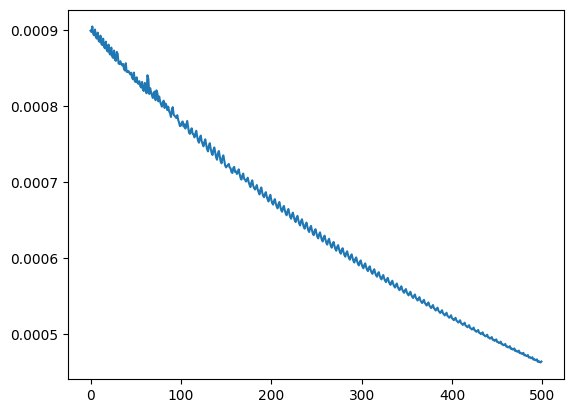

In [66]:
plt.plot(loses)

In [67]:
model.eval()

NeuralNet(
  (fc1): Linear(in_features=13, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
  (relu): ReLU()
)

In [68]:
import torch
from sklearn.metrics import confusion_matrix, accuracy_score


model.eval()

with torch.no_grad():

    test_inputs = torch.FloatTensor(x_test)
    # Adjust y_test to be 0-indexed for evaluation, matching model's output
    test_labels = torch.LongTensor(y_test - 1)

    # 3. Forward pass
    outputs = model(test_inputs)

    _, predicted = torch.max(outputs, 1)
acc = f1_score(test_labels.cpu().numpy(), predicted.cpu().numpy(), average='weighted')
cm = confusion_matrix(test_labels.cpu().numpy(), predicted.cpu().numpy())

print(f"Final Test Accuracy: {acc * 100:.2f}%")
print("Confusion Matrix:")
print(cm)

Final Test Accuracy: 85.94%
Confusion Matrix:
[[13  1  0]
 [ 1 10  3]
 [ 0  0  8]]
